In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

In [2]:
def last_to_first(list_):
    x = list_.pop(-1)
    list_.insert(0,x)

In [3]:
class Side:
    def __init__(self, x=[0,0], y=[0,1]):
        self._status = None
        self._cells = ()
        self._x = np.array(x)
        self._y = np.array(y)

In [4]:
class Cell:
    def __init__(self,x=0,y=0):
        self._type = None
        self._arms  = [None, None, None, None]
        self._sides = [None, None, None, None]
        self._good_rots = ()
        self._x = x
        self._y = y
    
    
    def init_by_sides(self):
        for i in range(4):
            self._arms[i] = self._sides[i]._status
        n_arms = sum(self._arms)
        if n_arms == 2:
            if self._arms[0] == self._arms[2]:
                self._type=5
            else:
                self._type=6
        else:
            self._type=n_arms
        self.good_rots()
        
    def init_by_type(self):
        if self._type in {0,1,3,4}:
            for i in range(4):
                if i < self._type:
                    self._arms[i]=True
                else:
                    self._arms[i]=False
        elif self._type == 5:
            self._arms = [True, False, True, False]
        elif self._type == 6:
            self._arms = [True, True, False, False]
        self.good_rots()
    
    
    def rot_sim(self):
        if self._type == 0:
            rot_sim = 1
        elif self._type == 1:
            rot_sim = 4
        elif self._type == 3:
            rot_sim = 4
        elif self._type == 4:
            rot_sim = 1
        elif self._type == 5:
            rot_sim = 2
        elif self._type == 6:
            rot_sim = 4
        return rot_sim
    
    
    def good_rots(self):
        self._good_rots = ()
        for i in range(self.rot_sim()):
            is_good = True
            for j in range(4):
                if self._sides[j]._status is not None:
                    if self._arms[j] != self._sides[j]._status:
                        is_good = False
            if is_good:
                self._good_rots += (i,)
            self.rot()
    
    
    def fix_sides(self):
        for i in range(4):
            self._sides[i]._status = self._arms[i] 
    
    
    def rot(self, n=1):
        for i in range(n):
            last_to_first(self._arms)
    
    
    def coords(self,):
        #For n_arms in {0,1,3,4} self._type is n_arms.
        #For n_arms=2 in opposite direction: self._type=5
        #For n_arms=2 in neighbor direction: self._type=6
        if self._type == None:
            x = np.array([0])
            y = np.array([0])
            coons = [None, None, None, None]
        elif self._type == 0:
            x = np.array([0])
            y = np.array([0])
            conns = [False, False, False, False]
        elif self._type == 1:
            x = np.array([0, 0, 0.25, 0, -0.25, 0])
            y = np.array([-0.5, -0.25, 0, 0.25, 0, -0.25])
            conns = [True, False, False, False]
        elif self._type == 3:
            x = np.array([0, 0, 0.25, 0.5, 0.25, 0, 0, 0])
            y = np.array([-0.5, -0.25, 0, 0, 0, 0.25, 0.5, -0.5])
            conns = [True, True, True, False]
        elif self._type == 4:
            x = np.array([0, 0, 0.25, 0.5, 0.25, 0, 0, 0, -0.25, -0.5, -0.25, 0])
            y = np.array([-0.5, -0.25, 0, 0, 0, 0.25, 0.5, 0.25, 0, 0, 0, -0.25])
            conns = [True, True, True, True]
        elif self._type == 5:
            x = np.array([0, 0])
            y = np.array([-0.5, 0.5])
            conns = [True, False, True, False]
        elif self._type == 6:
            x = np.array([0, 0, 0.25, 0.5])
            y = np.array([-0.5, -0.25, 0, 0])
            conns = [True, True, False, False]
        for i in range(4):
            if conns == self._arms:
                return x+0.5+self._x, y+0.5+self._y
            else:
                last_to_first(conns)
                x,y = -y,x
        
        
            

In [5]:
class Grid:
    def __init__(self, w, h):
        self._w = w
        self._h = h
        self._n_cells = w*h
        self._n_sides = w+h+2*h*w
        self._cells = []#[Cell() for i in range(self._n_cells)]
        self._sides = []#[Side() for i in range(self._n_sides)]
        #Create and link sides to cells:
        for yi in range(h+1):
            for xi in range(w+1):
                if xi < w:
                    s_h = Side([xi,xi+1],[yi,yi])
                    self._sides.append(s_h)
                    if yi > 0:
                        c_down = self._cells[w*yi+xi-w]
                        c_down._sides[2] = s_h
                        s_h._cells += (c_down,)
                if yi < h:
                    s_v = Side([xi,xi],[yi,yi+1])
                    self._sides.append(s_v)
                    if xi > 0:
                        c_left = self._cells[w*yi+xi-1]
                        c_left._sides[1] = s_v
                        s_v._cells += (c_left,)
                if xi < w and yi < h:
                    c = Cell(xi,yi)
                    self._cells.append(c)
                    c._sides[0] = s_h
                    c._sides[3] = s_v
                    s_v._cells += (c,)
                    s_h._cells += (c,)
                    
    
    def init_cells_by_sides(self):
        for i in range(self._n_cells):
            self._cells[i].init_by_sides()
    
    
    def random_sides(self):
        for i in range(self._n_sides):
            s = self._sides[i]
            if len(s._cells) == 1:
                s._status = False
            elif len(s._cells) == 2:
                s._status = bool(random.randrange(2))
        self.init_cells_by_sides()
    
    
    def mix(self):
        for j in range(self._n_sides):
            self._sides[j]._status=None
        
        for i in range(self._n_cells):
            self._cells[i].rot(random.randrange(4))
            self._cells[i].good_rots()
    
    
    def load_sides_types(self, sides, types):
        if len(sides) == self._n_sides:
            for i in range(self._n_sides):
                self._sides[i]._status = sides[i]
        else:
            print("Provided side legth",len(sides)
                  ,"doesn't match with grid's:", self._n_sides)
        
        if len(types) == self._n_cells:
            for i in range(self._n_cells):
                self._cells[i]._type = types[i]
                self._cells[i].init_by_type()
        else:
            print("Provided type legth",len(types)
                  ,"doesn't match with grid's:", self._n_cells)
        
        
    def plot(self, grid=False):
        for i in range(self._n_cells):
            c = self._cells[i]
            x, y = c.coords()
            n_rots = len(c._good_rots)
            if n_rots == 0:
                color = 'r-'
            elif n_rots == 1:
                color = 'g-'
            else:
                color = 'b-'
            plt.plot(x,y,color)
        if grid:
            for j in range(self._n_sides):
                s = self._sides[j]
                x, y, status = s._x, s._y, s._status
                if status == None:
                    color = 'k-'
                elif status:
                    color = 'g-'
                else:
                    color = 'r-'
                plt.plot(x,y,color)
        plt.show()
        

    

In [31]:
def solve(grid):
    print("Start")
    starting_info(grid)
    print("Dynamic")
    dynamic_no_decision(grid)

def fix_cell(cell, good_rot_i=0):
    cell.rot(cell._good_rots[good_rot_i])
    cell.fix_sides()
    
    
def starting_info(grid):
    for j in range(grid._n_sides):
        s = grid._sides[j]
        if len(s._cells) == 1:
            s._status = False
            
            
def dynamic_no_decision(grid):
    changed = True
    fixed_cells = set()
    while changed:
        #grid.plot(True)
        changed = False
        for i in range(grid._n_cells):
            c = grid._cells[i]
            if c not in fixed_cells:
                c.good_rots()
                if len(c._good_rots) == 0:
                    grid.plot(True)
                    print("Error, no solution.", c._x, c._y)
                    #sys.exit("aa! errors!")
                    return 1
                elif len(c._good_rots) == 1:
                    fix_cell(c)
                    fixed_cells.add(c)
                    #print("Fixed: ", c._x, c._y)
                    changed = True
    #grid.plot(True)
    return 0
        
def recursive(w,h, status_list, type_list):
    g = Grid(w,h)
    g.load_sides_types(status_list, type_list)
    if dynamic_no_decision(g):
        return 1
    else:
        done = True
        for i in range(g._n_cells):
            c = g._cells[i]
            if len(c._good_rots) > 1:
                c_to_fix = c
                done=False
        if done:
            g.plot()
            return 0

        for rot_i in range(len(c_to_fix._good_rots)):
            c_to_fix.rot(c_to_fix._good_rots[rot_i])
            c_to_fix.fix_sides()
            #print("Rec. fix:",c_to_fix._x,c_to_fix._y)
            status_list = [s._status for s in g._sides]
            recursive(w,h, status_list, type_list)



Init


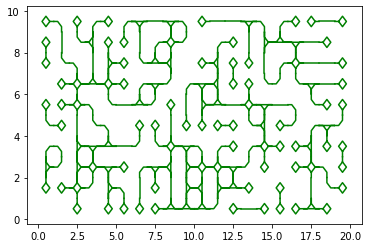

Mix


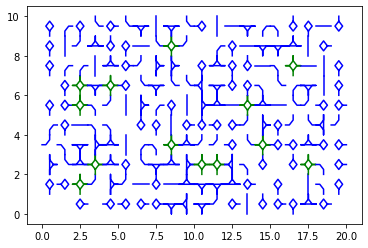

Start
Dynamic
Recursive


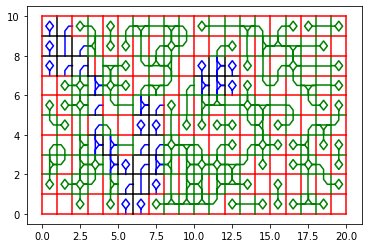

Error, no solution. 3 7


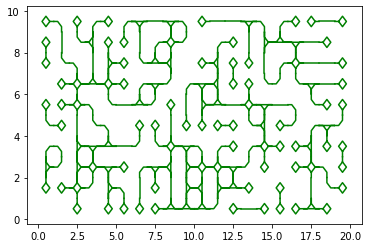

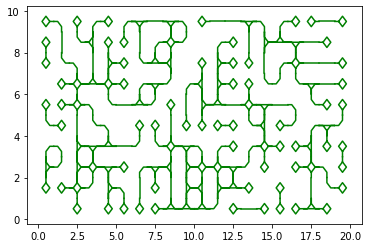

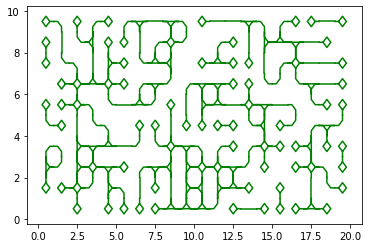

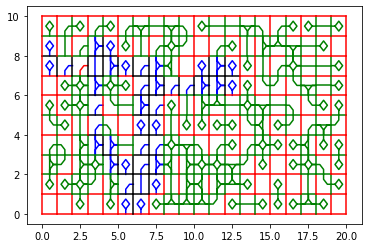

Error, no solution. 2 7


In [35]:
g = Grid(20,10)
print("Init")
g.random_sides()
g.plot()
print("Mix")
g.mix()
g.plot()
solve(g)
print("Recursive")
recursive(g._w, g._h, [s._status for s in g._sides], [c._type for c in g._cells])